In [3]:
# -------------------------------------------------------------
# Paso 1: Importar las librerías necesarias
# -------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid") # Establece el tema de Seaborn
print("✅ Librerías importadas.")


✅ Librerías importadas.


In [ ]:
# -------------------------------------------------------------
# Paso 2: Visualizar los datos crudos
# -------------------------------------------------------------
print("📥 Cargando el conjunto de datos...")

df = pd.read_csv("../datos/crudo/house_data.csv") # Carga el conjunto de datos

print("✅ Conjunto de datos cargado con éxito!")
print("Forma inicial de los datos:", df.shape)
print("\n🔍 Vista previa de los datos:")
print(df.head()) # Muestra las primeras filas del conjunto de datos


📥 Cargando el conjunto de datos...
✅ Conjunto de datos cargado con éxito!
Forma inicial de los datos: (84, 7)

🔍 Vista previa de los datos:
     price  sqft  bedrooms  bathrooms    location  year_built  condition
0   495000  1527         2        1.5      Suburb        1956       Good
1   752000  2526         3        2.5    Downtown        1998  Excellent
2   319000  1622         2        1.5       Rural        1975       Fair
3  1210000  3102         4        3.0  Waterfront        2005  Excellent
4   462000  1835         2        2.0       Urban        1982       Good


In [6]:
# -------------------------------------------------------------
# Paso 3: Si hay null, etc, el ingeniero de datos debe de saber como sustituirlo
# -------------------------------------------------------------
print("\n📊 Tipos de datos y verificación de valores nulos:")
print(df.info()) # Muestra información sobre el DataFrame, incluyendo tipos de datos y uso de memoria

print("\n❓ ¿Hay valores faltantes?")
print(df.isnull().sum()) # Verifica si hay valores nulos en cada columna



📊 Tipos de datos y verificación de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None

❓ ¿Hay valores faltantes?
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [ ]:
# -------------------------------------------------------------
# Paso 3: Si hay alguno mal formado se omite
# -------------------------------------------------------------
df = df.dropna()
df = df[df['price'] > 10000]  # Elimina filas con precios no válidos, mayores a 10000
df = df[df['sqft'] > 200]     # Elimina filas con sqft (pies cuadrados) no válidos, mayores a 200

In [ ]:
# -------------------------------------------------------------
# Paso 4: Estandarizar nombres de columnas (limpieza básica)
# Modificar nombres de columnas para que sean más legibles y equivalentes
# -------------------------------------------------------------
print("\n🧹 Limpiando nombres de columnas (minúsculas, guiones bajos)...")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Estandariza los nombres de las columnas
print("✅ Nombres de columnas estandarizados:")
print(df.columns.tolist())



🧹 Limpiando nombres de columnas (minúsculas, guiones bajos)...
✅ Nombres de columnas estandarizados:
['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


In [ ]:
# -------------------------------------------------------------
# Paso 5: Visualizar estadísticas básicas para detectar valores atípicos o problemas
# -------------------------------------------------------------
print("\n📈 Estadísticas resumidas básicas para columnas numéricas:")
print(df.describe()) # Muestra estadísticas básicas como media, mediana, etc.



📈 Estadísticas resumidas básicas para columnas numéricas:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000



📊 Distribución de precios de casas...


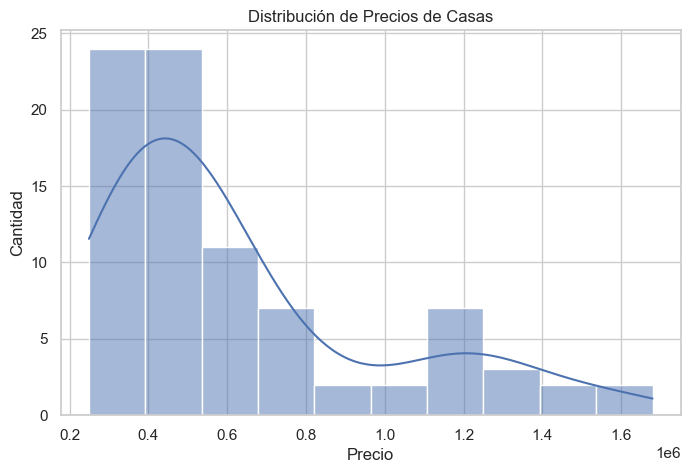

In [11]:
# -------------------------------------------------------------
# Step 6: Visualización de distribuciones (por ejemplo, precio, sqft). El resultado vemos que hay casas menos caras que baratas
# -------------------------------------------------------------
print("\n📊 Distribución de precios de casas...")

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True, bins=10)
plt.title("Distribución de Precios de Casas")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.show()


In [12]:
# -------------------------------------------------------------
# Step 7: Visualizar problemas obvios en los datos, como los valores negativos
# -------------------------------------------------------------
print("\n🔍 Mirando valores negativos o poco realistas...")

for col in ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built']:
    invalid = df[df[col] < 0]
    if not invalid.empty:
        print(f"⚠️ Se encontraron valores negativos en {col}:\n{invalid}")
    else:
        print(f"✅ No se encontraron valores negativos en {col}.")



🔍 Mirando valores negativos o poco realistas...
✅ No se encontraron valores negativos en price.
✅ No se encontraron valores negativos en sqft.
✅ No se encontraron valores negativos en bedrooms.
✅ No se encontraron valores negativos en bathrooms.
✅ No se encontraron valores negativos en year_built.


In [13]:
# -------------------------------------------------------------
# Step 8: Si hay duplicados, se eliminan
# -------------------------------------------------------------
print("\n🧹 Mirando filas duplicadas...")

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Se encontraron {duplicates} filas duplicadas. Eliminándolas...")
    df = df.drop_duplicates()
else:
    print("✅ No se encontraron filas duplicadas.")



🧹 Mirando filas duplicadas...
✅ No se encontraron filas duplicadas.


In [17]:
# -------------------------------------------------------------
# Step 9: Si se desea, se puede guardar la versión limpia en un archivo
# -------------------------------------------------------------
print("\n💾 Guardando versión limpia en archivo intermedio (paso opcional)...")

# Descomentar si se desea guardar en este punto
df.to_csv("../datos/crudo/cleaned_house_data.csv", index=False)
print("✅ Preprocesamiento de ingeniería de datos completo!")



💾 Guardando versión limpia en archivo intermedio (paso opcional)...
✅ Preprocesamiento de ingeniería de datos completo!


In [ ]:
# Sucesión de pasos para la ingeniería de datos, se pueden realizar mas pasos según sea necesario

In [1]:
pwd

'/Users/carloscg00/Desktop/mlops-app-house-price/cuarderno'